In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

In [ ]:
df = pd.read_csv("/content/House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
df.shape

(14620, 23)

In [ ]:
df.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [ ]:
unique_renovation_years = df['Renovation Year'].value_counts()
print(unique_renovation_years)

Renovation Year
0       13954
2014       76
2013       30
2003       27
2005       23
        ...  
1948        1
1967        1
1944        1
1959        1
1962        1
Name: count, Length: 68, dtype: int64


In [ ]:
df.drop(columns=['Renovation Year','id'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   14620 non-null  int64  
 1   number of bedrooms                     14620 non-null  int64  
 2   number of bathrooms                    14620 non-null  float64
 3   living area                            14620 non-null  int64  
 4   lot area                               14620 non-null  int64  
 5   number of floors                       14620 non-null  float64
 6   waterfront present                     14620 non-null  int64  
 7   number of views                        14620 non-null  int64  
 8   condition of the house                 14620 non-null  int64  
 9   grade of the house                     14620 non-null  int64  
 10  Area of the house(excluding basement)  14620 non-null  int64  
 11  Ar

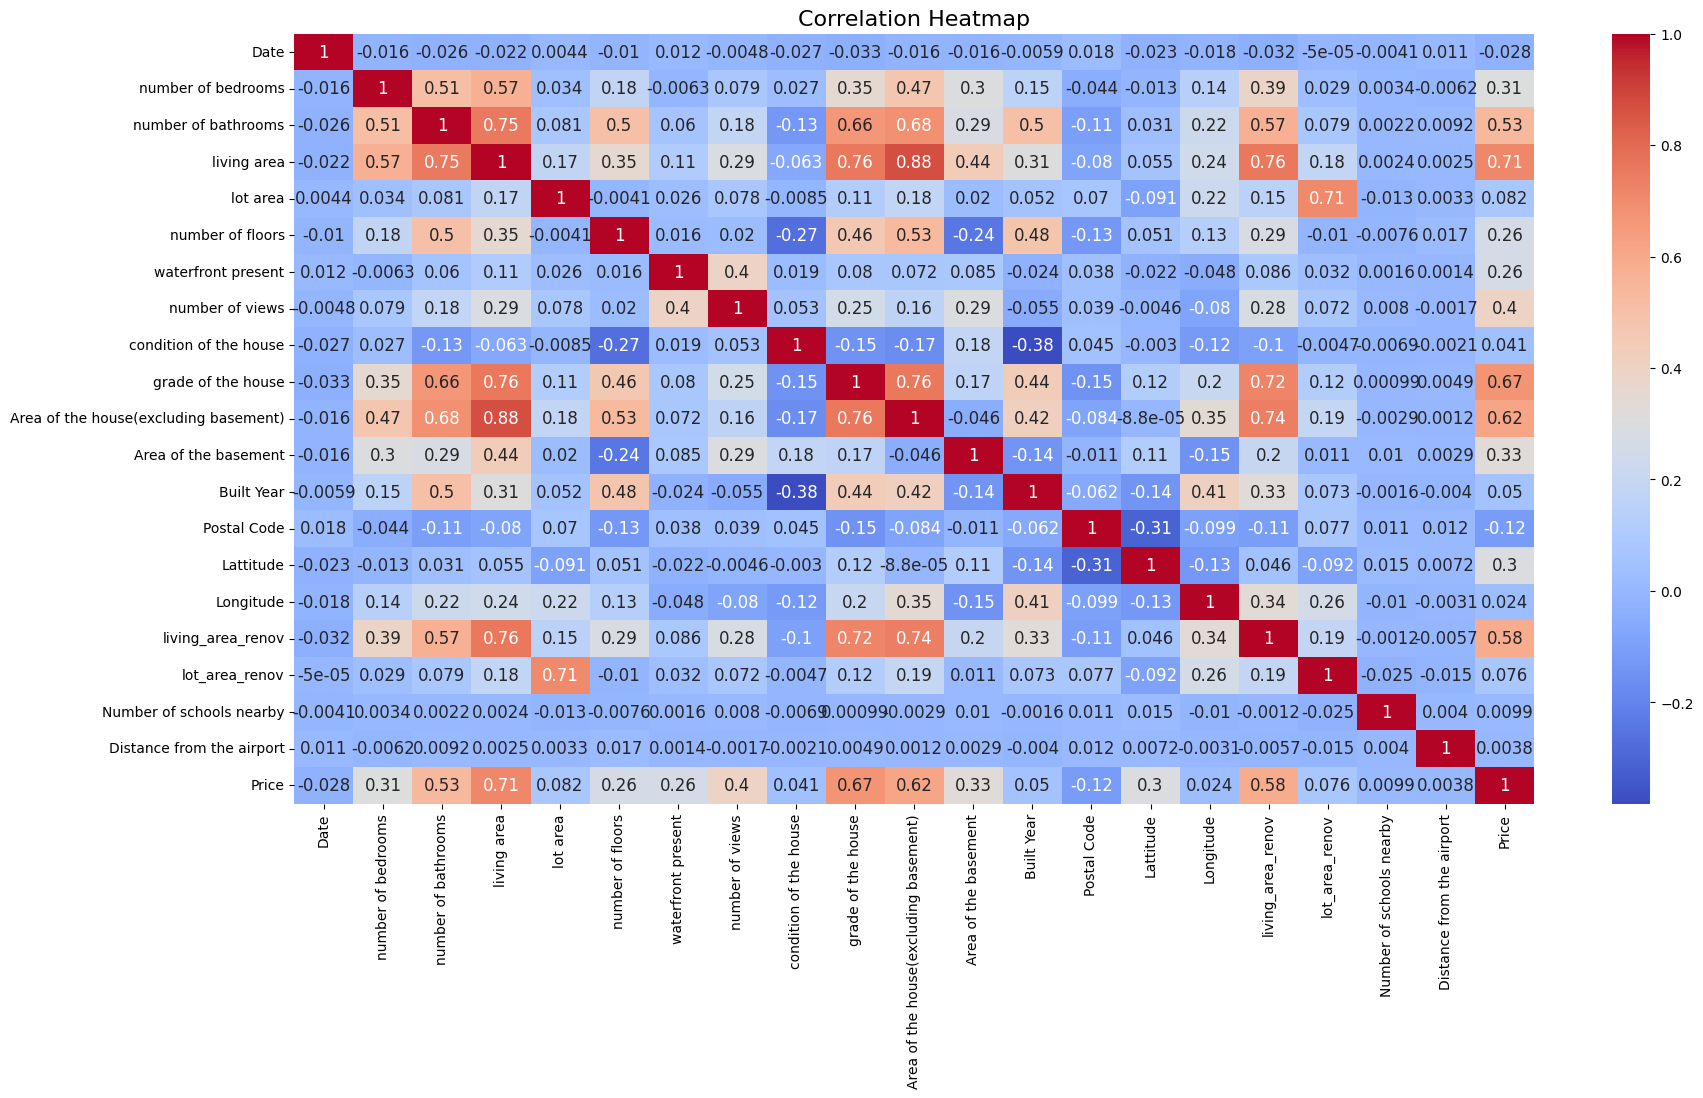

In [ ]:
# Plotting heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 12})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
df.columns

Index(['Date', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Postal Code', 'Lattitude', 'Longitude',
       'living_area_renov', 'lot_area_renov', 'Number of schools nearby',
       'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
corr_matrix = df.corr()
corr = np.array(corr_matrix)[1]
cols= df.columns
columns_to_drop = []

for i in range(len(cols)):
    print(cols[i], "-->", np.round(corr[i], 3))
    if np.isnan(corr[i]) or np.abs(corr[i]) < 0.01:
        columns_to_drop.append(cols[i])

df.drop(columns_to_drop, axis=1, inplace=True)

scaler = StandardScaler()


# Scale the DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df=df_scaled

Date --> -0.016
number of bedrooms --> 1.0
number of bathrooms --> 0.51
living area --> 0.571
lot area --> 0.034
number of floors --> 0.177
waterfront present --> -0.006
number of views --> 0.079
condition of the house --> 0.027
grade of the house --> 0.353
Area of the house(excluding basement) --> 0.474
Area of the basement --> 0.3
Built Year --> 0.153
Postal Code --> -0.044
Lattitude --> -0.013
Longitude --> 0.136
living_area_renov --> 0.39
lot_area_renov --> 0.029
Number of schools nearby --> 0.003
Distance from the airport --> -0.006
Price --> 0.308


In [ ]:
X = df.drop(columns=['Price']).values
y = df['Price'].values


In [ ]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

data = pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=['target'])], axis=1)

data_clean = remove_outliers_iqr(df)
df=data_clean


In [ ]:
df.shape

(10424, 18)

# **LINEAR REGRESSION**

In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


kf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=33)  # Use RepeatedKFold for repeat K-fold cross-validation
me_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
r2_list = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train, y_train)
    y_pred = linear_regressor.predict(X_test)



    me = np.mean(y_test - y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    me_scores.append(me)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_list.append(r2)


print("Metrics for Original Features (X):")
print(f"Mean Error (ME): {np.mean(me_scores)}")
print(f"Mean Absolute Error (MAE): {np.mean(mae_scores)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Mean Squared Error (MSE): {np.mean(mse_scores)}")
print(f"R-squared: {np.mean(r2_list)}")



# Perform cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for interpretability
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-validation scores (MSE) for Linear Regression:", cv_scores)
print("Mean cross-validation score (MSE):", np.mean(cv_scores))
print("Standard deviation of cross-validation scores (MSE):", np.std(cv_scores))


Metrics for Original Features (X):
Mean Error (ME): 0.00035469574434821607
Mean Absolute Error (MAE): 0.34430343644463746
Root Mean Squared Error (RMSE): 0.560171618521365
Mean Squared Error (MSE): 0.31629008349792376
R-squared: 0.6837784809344275
Cross-validation scores (MSE) for Linear Regression: [0.37388587 0.36839569 0.313716   0.22618996 0.26120554 0.35329594
 0.24111034 0.27954471 0.42531318 0.32327578 0.35867856 0.27195206
 0.40012273 0.2732037  0.26486103 0.27660206 0.38313721 0.3745426
 0.29046444 0.26698479 0.34438321 0.29989351 0.27142013 0.28587327
 0.26419708 0.28632401 0.27100251 0.29629563 0.43661155 0.40621938]
Mean cross-validation score (MSE): 0.31629008349792376
Standard deviation of cross-validation scores (MSE): 0.057139640451324344



#  **KNN MODEL**



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X, y, and X_edit are already defined
# Define the number of folds and repetitions
n_splits = 5
n_repeats = 3

# Initialize Repeated K-Fold
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Initialize scalers
scaler = MinMaxScaler()

# Initialize KNN models
knn_model = KNeighborsRegressor(n_neighbors=9)

# Initialize dictionaries to store metrics
metrics = {
    'mae': [], 'mse': [], 'rmse': [], 'r2': [],
    'mae_edit': [], 'mse_edit': [], 'rmse_edit': [], 'r2_edit': []
}

# Perform repeated K-Fold cross-validation
for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit KNN models
    knn_model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = knn_model.predict(X_test_scaled)

    # Calculate metrics for original features (X)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    metrics['mae'].append(mae)
    metrics['mse'].append(mse)
    metrics['rmse'].append(rmse)
    metrics['r2'].append(r2)


# Calculate average metrics
average_metrics = {k: np.mean(v) for k, v in metrics.items()}

print("Average Metrics for Original Features (X):")
print(f"Mean Absolute Error (MAE): {average_metrics['mae']}")
print(f"Mean Squared Error (MSE): {average_metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics['rmse']}")
print(f"R-squared (R2): {average_metrics['r2']}")



Average Metrics for Original Features (X):
Mean Absolute Error (MAE): 0.2514748939600134
Mean Squared Error (MSE): 0.24845190496455913
Root Mean Squared Error (RMSE): 0.4967193371196057
R-squared (R2): 0.7527862897456106


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X_scaled, y, cv=rkf, scoring='neg_mean_squared_error')
print("Ridge Regression CV Mean Score:", -ridge_scores.mean())

# lasso = Lasso(alpha=0.1, max_iter=10000)
# lasso_scores = cross_val_score(lasso, X_scaled, y, cv=rkf, scoring='neg_mean_squared_error')
# print("Lasso Regression CV Mean Score:", -lasso_scores.mean())

# Evaluating the models with repeated k-fold cross-validation
ridge_rmse = []
ridge_mae = []
ridge_r2 = []

# lasso_rmse = []
# lasso_mae = []
# lasso_r2 = []

for train_index, test_index in rkf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)

    # lasso.fit(X_train, y_train)
    # lasso_pred = lasso.predict(X_test)

    ridge_rmse.append(mean_squared_error(y_test, ridge_pred, squared=False))
    ridge_mae.append(mean_absolute_error(y_test, ridge_pred))
    ridge_r2.append(r2_score(y_test, ridge_pred))

    # lasso_rmse.append(mean_squared_error(y_test, lasso_pred, squared=False))
    # lasso_mae.append(mean_absolute_error(y_test, lasso_pred))
    # lasso_r2.append(r2_score(y_test, lasso_pred))

print("Ridge Regression - Mean RMSE:", np.mean(ridge_rmse))
print("Ridge Regression - Mean MAE:", np.mean(ridge_mae))
print("Ridge Regression - Mean R-squared:", np.mean(ridge_r2))

# print("Lasso Regression - Mean RMSE:", np.mean(lasso_rmse))
# print("Lasso Regression - Mean MAE:", np.mean(lasso_mae))
# print("Lasso Regression - Mean R-squared:", np.mean(lasso_r2))


Ridge Regression CV Mean Score: 0.31648177305056746
Ridge Regression - Mean RMSE: 0.5617144919075138
Ridge Regression - Mean MAE: 0.34349483836331374
Ridge Regression - Mean R-squared: 0.6836202028284654


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

n_splits = 5
n_repeats = 3

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

scaler = StandardScaler()

svm_model = SVR()

metrics = {
    'mae': [], 'mse': [], 'rmse': [], 'r2': [],
}

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    metrics['mae'].append(mae)
    metrics['mse'].append(mse)
    metrics['rmse'].append(rmse)
    metrics['r2'].append(r2)



average_metrics = {k: np.mean(v) for k, v in metrics.items()}

print("Average Metrics for Original Features (X):")
print(f"Mean Absolute Error (MAE): {average_metrics['mae']}")
print(f"Mean Squared Error (MSE): {average_metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics['rmse']}")
print(f"R-squared (R2): {average_metrics['r2']}")



Average Metrics for Original Features (X):
Mean Absolute Error (MAE): 0.22692542996497184
Mean Squared Error (MSE): 0.2613742788625529
Root Mean Squared Error (RMSE): 0.5062728093594886
R-squared (R2): 0.7422630593464256


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

n_splits = 5
n_repeats = 3

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

scaler = StandardScaler()

rf_model = RandomForestRegressor(random_state=42)

metrics = {
    'mae': [], 'mse': [], 'rmse': [], 'r2': [], 'rf_score': [],
}

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    rf_score = rf_model.score(X_test, y_test)

    metrics['mae'].append(mae)
    metrics['mse'].append(mse)
    metrics['rmse'].append(rmse)
    metrics['r2'].append(r2)
    metrics['rf_score'].append(rf_score)



average_metrics = {k: np.mean(v) for k, v in metrics.items()}

print("Average Metrics for Original Features (X):")
print(f"Mean Absolute Error (MAE): {average_metrics['mae']}")
print(f"Mean Squared Error (MSE): {average_metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics['rmse']}")
print(f"R-squared (R2): {average_metrics['r2']}")
print(f"Random Forest Score: {average_metrics['rf_score']}")



Average Metrics for Original Features (X):
Mean Absolute Error (MAE): 0.19042713252308444
Mean Squared Error (MSE): 0.14223863528828684
Root Mean Squared Error (RMSE): 0.37588678168519873
R-squared (R2): 0.8581153470872358
Random Forest Score: 0.8581153470872358
